In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib

# Book genre analysis, based on https://www.kaggle.com/sp1thas/book-depository-dataset/data 
# WIP 


In [4]:
ds = pd.read_csv('dataset/dataset.csv', usecols=['authors', 'bestsellers-rank', 'categories', 'description', 'for-ages', 'id', 'lang', 'rating-avg', 'rating-count', 'title'])


In [42]:
ds.head(10)

,authors,bestsellers-rank,categories,description,for-ages,id,lang,rating-avg,rating-count,title
0,[1],57858,"[220, 233, 237, 2644, 2679, 2689]",They were American and British air force offic...,NaN,9780393325799,en,4.24,6688.0,The Great Escape
1,"[2, 3]",114465,"[235, 3386]",John Moran and Carl Williams were the two bigg...,NaN,9781844547371,en,3.59,291.0,Underbelly : The Gangland War
2,[4],"61,471","[241, 245, 247, 249, 378]","Plain English is the art of writing clearly, c...",NaN,9780199669172,en,4.18,128.0,Oxford Guide to Plain English
3,[5],"1,347,994","[245, 253, 263, 273, 274, 276, 279, 280, 281, ...","When travelling, do you want to journey off th...",NaN,9781444185492,en,NaN,NaN,Get Talking and Keep Talking Portuguese Total ...
4,[6],58154,"[1938, 1941, 1995]","No matter what your actual job title, you are-...",NaN,9780321934079,en,4.30,212.0,"The Truthful Art : Data, Charts, and Maps for ..."
5,[7],31580,"[245, 247, 249, 274, 282, 2978, 2984]","NEW YORK TIMES BESTSELLER - A sharp, funny gra...",NaN,9780812995701,en,4.36,3540.0,Dreyer's English : An Utterly Correct Guide to...
6,"[8, 9]",2224533,"[2649, 1681, 2975, 2710, 3098, 3100]",From the author of In the Hurricane's Eye and ...,NaN,9781611763577,en,4.15,62177.0,In the Heart of the Sea : The Tragedy of the W...
7,[10],75115,"[40, 57, 96, 1942, 1946]","""The Art of Halo"" is the ultimate gallery of t...",NaN,9780857685629,en,4.36,85.0,Halo: The Great Journey : The Art of Building ...
8,[11],105215,"[233, 245, 247, 249, 260]",Mary Norris has spent more than three decades ...,NaN,9780393352146,en,3.58,5125.0,Between You & Me : Confessions of a Comma Queen
9,"[12, 13]",1749798,"[3100, 3101]","On October 12, 1972, a plane carrying a team o...",NaN,9781520074399,en,4.10,57616.0,Alive : The Story of the Andes Survivors


In [5]:
cat = pd.read_csv('dataset/categories.csv')

In [6]:
ds.head(5)
cat.head(5)

,category_id,category_name
0,1998,.Net Programming
1,176,20th Century & Contemporary Classical Music
2,3291,20th Century & Contemporary Classical Music
3,2659,20th Century History: C 1900 To C 2000
4,2661,21st Century History: From C 2000 -


In [134]:



def findBook(title, df):
    resDf = pd.DataFrame()
    for idx, i in df['title'].str.contains(title, case=False).iteritems():
        if i:
            genres = ""
            res = df['categories'][idx].strip('][').split(', ') 
            for c in res:
                genres += cat.loc[cat['category_id']==int(c)]['category_name'].values[0] + ", "
            resDf = resDf.append(pd.DataFrame([[df['title'][idx], genres]], columns=['title', 'genre']), ignore_index=True)
    return resDf

def findGenre(genre, df):
    resDf = pd.DataFrame()
    catList = []
    catName = []
    for idx, i in cat['category_name'].str.contains(genre, case=False).iteritems():
        if i:
            catList.append((cat['category_id'][idx],cat['category_name'][idx]))
    for idx, i in df['categories'].iteritems():
        for c in catList:
            if str(c[0]) in i.strip('][').split(', '):
                resDf = resDf.append(pd.DataFrame([[df['title'][idx], c[1]]], columns=['title', 'genre']), ignore_index=True)
    return resDf


In [135]:
q=findGenre("Memoirs",ds)
q.head(10)

,title,genre
0,The Great Escape,Memoirs
1,Between You & Me : Confessions of a Comma Queen,Memoirs
2,Lands of Lost Borders Lib/E : A Journey on the...,Memoirs
3,The First Third & Other Writings,Memoirs
4,The Twice-Born : Life and Death on the Ganges,Memoirs
5,Traveling with Ghosts : A Memoir,Memoirs
6,On the Trail of Genghis Khan : An Epic Journey...,Memoirs
7,"Walking to Listen : 4,000 Miles Across America...",Memoirs
8,The Only Street in Paris : Life on the Rue Des...,Memoirs
9,Class with the Countess : How to Live with Ele...,Memoirs


In [136]:
q=findGenre("Science",ds)
q.head(10)

,title,genre
0,"A World Without ""Whom"" : The Essential Guide t...",Impact Of Science & Technology On Society
1,Augmented Human,Computer Science
2,Falling Upwards Lib/E : How We Took to the Air,History Of Science
3,The Living Great Lakes : Searching for the Hea...,"Biology, Life Sciences"
4,The Living Great Lakes : Searching for the Hea...,"Ecological Science, The Biosphere"
5,The Living Great Lakes : Searching for the Hea...,Science: General Issues
6,Systems Science and Modeling for Ecological Ec...,"Ecological Science, The Biosphere"
7,Systems Science and Modeling for Ecological Ec...,"Environmental Science, Engineering & Technology"
8,Problems and Solutions in Biological Sequence ...,Computer Science
9,"Why I Sneeze, Shiver, Hiccup and Yawn",Science


In [8]:
q = findBook('galaxy', ds)
q.head(100)

,title,genre
0,Star Wars: The Rise of Skywalker: The Galaxy N...,"Children's Fiction, Children's General Story B..."
1,Samsung Galaxy A80 User Manual : A Comprehensi...,"Digital Photography: Consumer/user Guides, Pho..."
2,The Vegan Soulfood Guide to the Galaxy : Your ...,"Vegetarian Cookery, National & Regional Cuisine,"
3,Nasty Galaxy,"Fashion & Textiles: Design, Memoirs, Microecon..."
4,Composition Notebook : Wide Ruled Space Galaxy...,"Graphic Novels, Anime & Manga, Graphic Novels,..."
...,...,...
95,Drax Vol. 1: The Galaxy's Best Detective,"Graphic Novels: Superheroes, Graphic Novels: S..."
96,Guardians Of The Galaxy & X-men: The Black Vortex,"Graphic Novels: Superheroes, Graphic Novels: S..."
97,All-new Guardians Of The Galaxy Vol. 2 : Rider...,"Graphic Novels: Superheroes, Graphic Novels: S..."
98,Guardians Of The Galaxy By Jim Valentino Volume 3,"Graphic Novels: Superheroes, Graphic Novels: S..."


In [58]:
len(ds)

1086955

In [69]:

d={}
for idx, i in ds['title'].iteritems():
    res = ds['categories'][idx].strip('][').split(', ') 
    for c in res:
        if len(c)>0:
            if c in d.keys():
                d[c]+=1
            else:
                d[c]=1


In [73]:
f = {}
for i in d.keys():
    ct = cat.loc[cat['category_id']==int(i)]['category_name'].values
    if len(ct)>0:
        f[ct[0]] = d[i]

catHist = pd.DataFrame.from_dict({'c':list(f.keys()), 'r':list(f.values())})


In [91]:
catHist.iloc[catHist['r'].idxmax()]

c    Contemporary Fiction
r                   54805
Name: 321, dtype: object

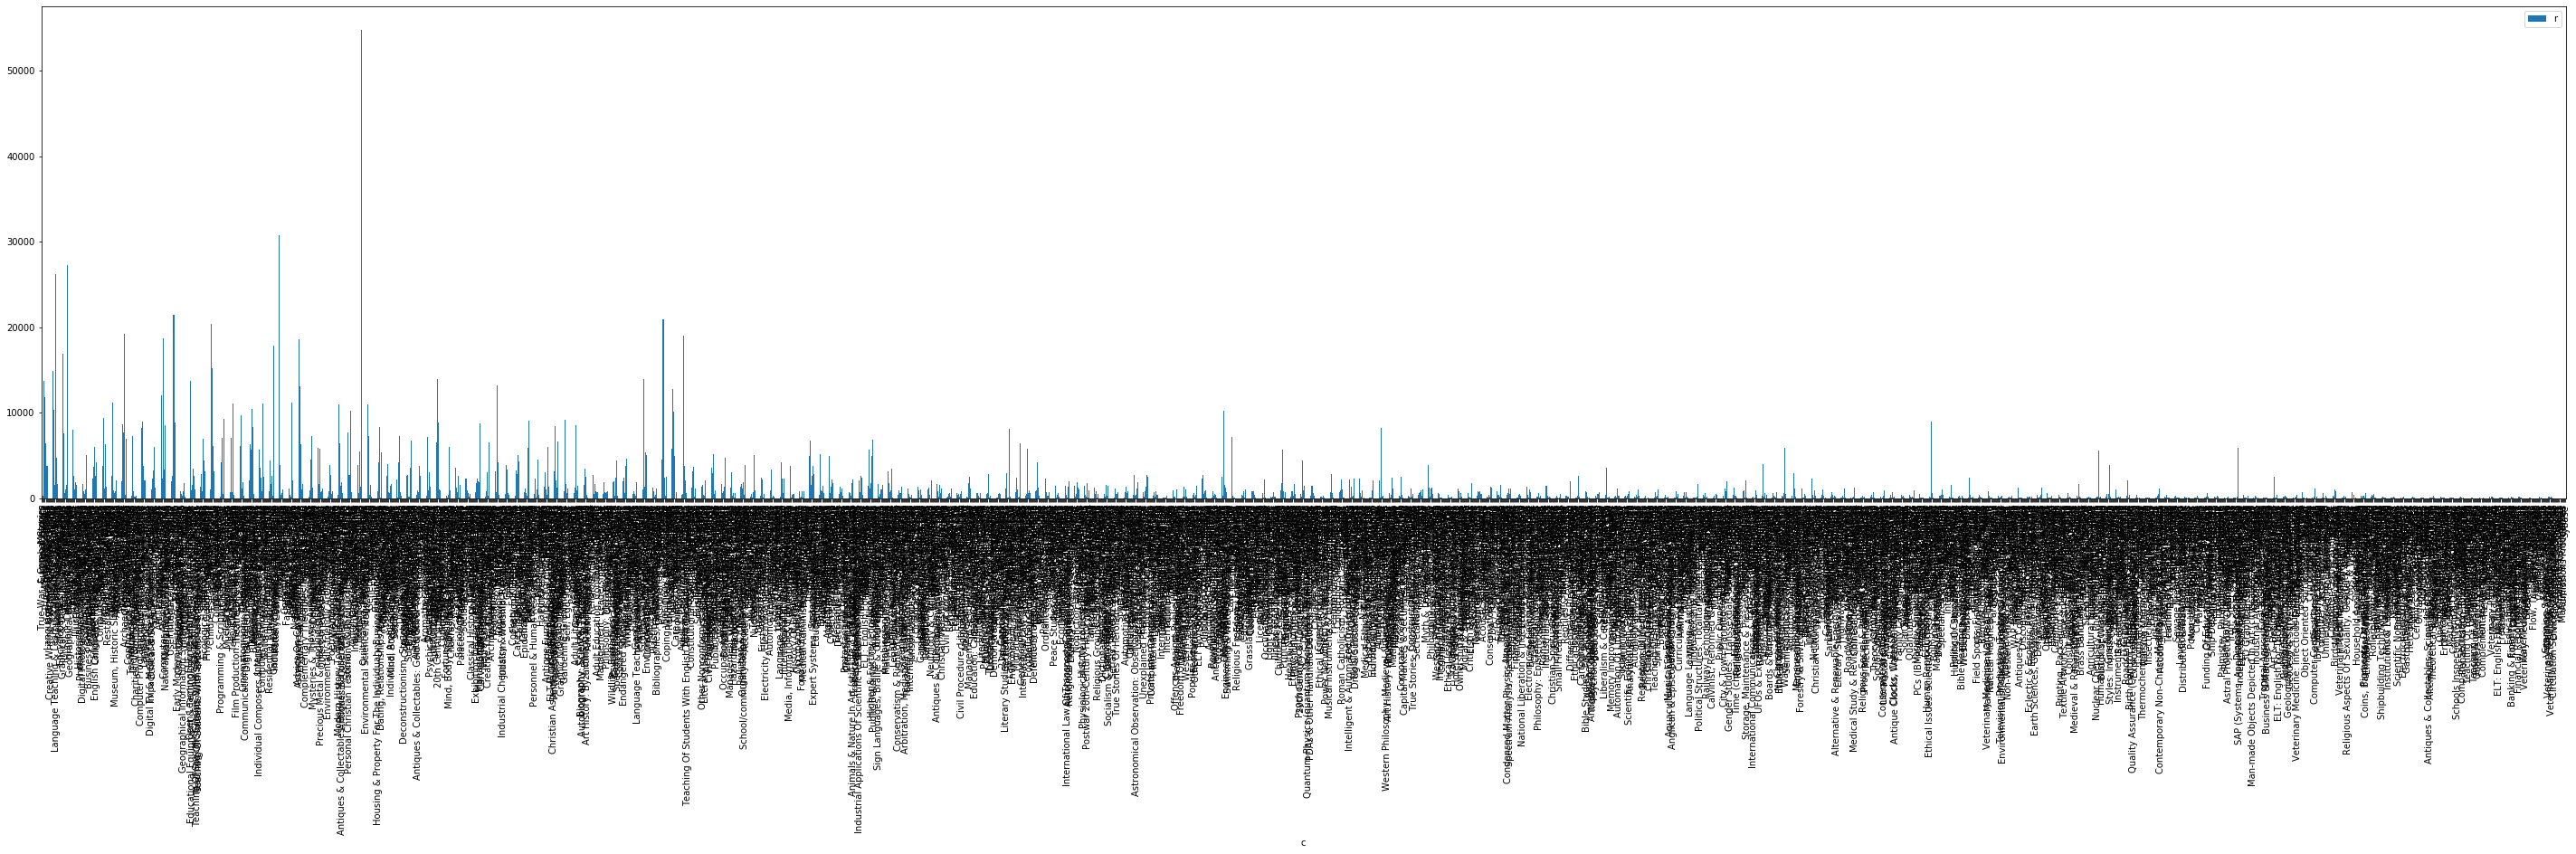

In [92]:
catHist.plot.bar(x='c',y='r', figsize=(50,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31ae48d908>]],
      dtype=object)

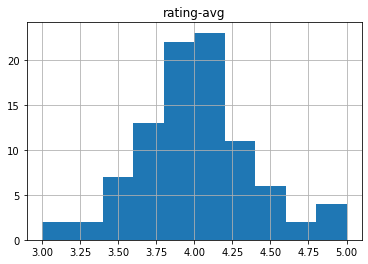

In [18]:
ds[0:100].hist(column='rating-avg')
